In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-bvp-galerkin)=
# The Galerkin method

Using finite differences we defined a collocation method in which an approximation of the differential equation is required to hold at a finite set of nodes. In this section we present an alternative based on integration rather than differentiation. Our presentation will be limited to the linear BVP

$$
u'' = p(x)\,u' + q(x)\,u + r(x), \quad a \le x \le b, \quad u(a)=0,\;
u(b)=0.
$$

However, we will assume that the linear problem is presented in the equivalent form

:::{math}
    :label: strongbvp
    - \frac{d }{d x} \Bigl[ c(x)\, u'(x) \Bigr] + s(x) \, u(x) = f(x),
    \quad u(a)=0,\; u(b)=0.
:::

Such a transformation is always possible, at least in principle (see [Exercise 3](problem-galerkin-galintfactor)), and the case when $u(a)$ and $u(b)$ are nonzero can also be incorporated (see [Exercise 2](problem-galerkin-bvpnonhom)). The approach is also adaptable to Neumann conditions (see [Exercise 5](problem-galerkin-neumann)). As with finite differences, a nonlinear problem is typically solved by using a Newton iteration to create a sequence of linear problems.

## Weak formulation

Let {eq}`strongbvp` be multiplied by a generic function $\psi(x)$ called the **test function**, and then integrate both sides in $x$:

:::{math}
:label: int-by-parts
\begin{split}
\int_a^b f(x)\psi(x) \,dx  &= \int_a^b \bigl[ -(c(x)u'(x))'\psi(x) +
s(x)u(x)\psi(x) \bigr] \,dx \\
&= \Bigl[-c(x)u'(x)\psi(x) \Bigr]_{\,a}^{\,b} + \int_a^b \bigl[ c(x)u'(x)\psi'(x) + s(x)u(x)\psi(x)\bigr] \, dx. 
\end{split}
:::

The last line above used an integration by parts.

We now make an important and convenient assumption about the test function. The first term in {eq}`int-by-parts`, consisting of boundary evaluations, disappears if we require that $\psi(a)=\psi(b)=0$. Doing so leads to

:::{math}
:label: weakbvp
  \int_a^b \bigl[ c(x)u'(x)\psi'(x) + s(x)u(x)\psi(x)\bigr]  \,dx = \int_a^b f(x)\psi(x) \,dx,
:::

which is known as the **weak form** of the differential equation {eq}`strongbvp`. 

```{index} ! weak solution
```
:::{proof:definition} Weak solution
If $u(x)$ is a function such that {eq}`weakbvp` is satisfied for all valid choices of $\psi$, we say that $u$ is a **weak solution** of the BVP {eq}`strongbvp`. 
:::

Every solution of {eq}`strongbvp` (what we might now call the strong form of the problem) is a weak solution, but the converse is not always true. While the weak form might look odd, in many mathematical models it could be considered more fundamental than {eq}`strongbvp`. 

## Galerkin conditions

Our goal is to solve a finite-dimensional problem that approximates the weak form of the BVP. Let $\phi_0,\phi_1,\ldots,\phi_m$ be linearly independent functions satisfying $\phi_i(a)=\phi_i(b)=0$. If we require

$$
\psi(x) = \sum_{i=1}^m z_i \phi_i(x),
$$

then {eq}`weakbvp` becomes, after some rearrangement,

$$
\begin{split}
  \sum_{i=1}^m z_i \left[ \int_a^b  \bigl[ c(x)u'(x)\phi_i'(x)\,dx  + s(x)u(x)\phi_i(x) - f(x) \phi_i(x)\bigr] \, d x \right] = 0.
\end{split}
$$

One way to satisfy this condition is to ensure that the term inside the brackets is zero for each possible value of $i$, that is,

:::{math}
:label: weakdiscrete
  \int_a^b \bigl[ c(x)u'(x)\phi_i'(x)  +  s(x)u(x)\phi_i(x)\bigr] \,dx = \int_a^b f(x)\phi_i(x) \,dx 
:::

for $i=1,\ldots,m$. The independence of the $\phi_i$ furthermore guarantees that this is the *only* possibility, so we no longer need to consider the $z_i$.

Now that we have approximated the weak form of the BVP by a finite set of constraints, the next step is to represent the approximate solution by a finite set as well. A natural choice is to approximate $u(x)$ the same way as we did the test function $\psi$, where the $\phi_j$ form a basis for representing the solution:

:::{math}
:label: galsolution
  u(x) = \sum_{j=1}^m w_j \phi_j(x).
:::

Substituting {eq}`galsolution` into {eq}`weakdiscrete` implies

$$
  \int_a^b \left\{ c(x) \Bigl[ \sum_{j=1}^m w_j \phi_j'(x) \Bigr] \phi_i'(x)  +
  s(x)\Bigl[ \sum_{j=1}^m w_j \phi_j(x) \Bigr]\phi_i(x) \right\} \,dx = \int_a^b f(x)\phi_i(x) \,dx
$$

for $i=1,\ldots,m$. This rearranges easily into

```{index} ! Galerkin conditions
```
:::{math}
:label: galerkin
  \sum_{j=1}^m w_j \left[ \int_a^b c(x)\phi_i'(x)\phi_j'(x) \,dx  +
  \int_a^b s(x)\phi_i(x)\phi_j(x) \,dx \right]  = \int_a^b f(x)\phi_i(x) \,dx,
:::

still for each $i=1,\ldots,m$. These are the **Galerkin conditions** defining a numerical solution. They follow entirely from the BVP and the choice of the $\phi_i$.

The conditions {eq}`galerkin` are a linear system of equations for the unknown coefficients $w_j$. Define $m\times m$ matrices $\mathbf{K}$  and $\mathbf{M}$, and the vector $\mathbf{f}$, by

:::{math}
:label: galerkinsystem
\begin{split}
    K_{ij} &= \int_a^b c(x)\phi_i'(x)\phi_j'(x) \,dx, \quad i,j=0,\ldots,m,\\
    M_{ij} &= \int_a^b s(x)\phi_i(x)\phi_j(x) \,dx,
    \quad i,j=0,\ldots,m,   \\
    f_i &= \int_a^b f(x)\phi_i(x) \,dx \quad i=0,\ldots,m. 
\end{split}
:::

Then {eq}`galerkin` is simply

:::{math}
:label: galerkinsystemlinalg
  (\mathbf{K}+\mathbf{M})\mathbf{w} = \mathbf{f}.
:::

```{index} ! stiffness matrix, ! mass matrix
```
The matrix $\mathbf{K}$ is called the **stiffness matrix** and $\mathbf{M}$ is called the **mass matrix**. By their definitions, they are symmetric. The last piece of the puzzle is to make some selection of $\phi_1,\ldots,\phi_m$ and obtain a fully specified algorithm.

::::{proof:example}
  Suppose we are given $-u''+4u=x$, with $u(0)=u(\pi)=0$. We could choose the basis functions $\phi_k=\sin(kx)$ for $k=1,2,3$. Then
  \begin{align*}
    M_{ij} & = 4 \int_0^\pi \sin(ix) \sin(jx)\, dx, \\
    K_{ij} & = ij \int_0^\pi \cos(ix) \cos(jx)\, dx, \\
    f_i &= \int_0^\pi x \sin(ix)\, dx.
  \end{align*}
  With some calculation (or computer algebra), we find
  
$$
    \mathbf{M} = 2\pi
    \begin{bmatrix}
      1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1
    \end{bmatrix}, \qquad
     \mathbf{K} = \frac{\pi}{2}
    \begin{bmatrix}
      1 & 0 & 0 \\ 0 & 4 & 0 \\ 0 & 0 & 9
    \end{bmatrix}, \qquad
    \mathbf{f} = \pi
    \begin{bmatrix}
      1 \\ -1/2 \\ 1/3
    \end{bmatrix}.
  $$

  Upon solving the resulting diagonal linear system, the approximate solution is
  
$$
  \frac{2}{5}\sin(x) - \frac{1}{8} \sin(2x) + \frac{2}{39}\sin(3x).
$$
::::

## Finite elements

```{index} interpolation; by piecewise linear polynomials
```

One useful and general choice for the $\phi_i$ are the piecewise linear hat functions constructed in {numref}`section-localapprox-pwlin`. As usual, we select nodes $a=t_0 < t_1 < \cdots < t_n=b$. Also define

$$
  h_i = t_i - t_{i-1}, \qquad i=1,\ldots,n.
$$

Then we set $m=n-1$, and the $\phi_i$ in {eq}`galsolution` are

:::{math}
:label: plfembasis
  \phi_i(x) =  H_i(x) =
  \begin{cases}
      \dfrac{x-t_{i-1}}{h_i} & \text{if $x\in[t_{i-1},t_i]$},\\[2.5ex]
      \dfrac{t_{i+1}-x}{h_{i+1}} & \text{if
          $x\in[t_{i},t_{i+1}]$},\\[2.5ex]
      0 & \text{otherwise}.
  \end{cases}
:::

Recall that these functions are cardinal, i.e., $H_i(t_i)=1$ and $H_i(t_j)=0$ if $i\neq j$. Hence

:::{math}
:label: fempl
  u(x) = \sum_{j=1}^m w_j \phi_j(x) = \sum_{j=1}^{n-1} u_j H_j(x),
:::

where as usual $u_j$ is the value of the numerical solution at $t_j$. Note that we omit $H_0$ and $H_n$, which equal one at the endpoints of the interval, because the boundary conditions on $u$ render them irrelevant.

The importance of the hat function basis in the Galerkin method is that each one is nonzero in only two adjacent intervals. As a result, we shift the focus from integrations over the entire interval in {eq}`galerkinsystem` to integrations over each subinterval, $I_k=[t_{k-1},t_k]$. Specifically, we use

:::{math}
    :label: femsystem
    \begin{split}
      K_{ij} &= \sum_{k=1}^{n} \left[ \int_{I_k} c(x) H_i'(x) H_j'(x) \,dx\right],
               \qquad i,j=1,\ldots,n-1, \\
        M_{ij} &= \sum_{k=1}^{n} \left[ \int_{I_k} s(x)H_i(x)H_j(x) \,dx\right],
         \qquad i,j=1,\ldots,n-1,  \\
      f_i &= \sum_{k=1}^{n} \left[ \int_{I_k}  f(x) H_i(x) \,dx\right]
            \qquad i=1,\ldots,n-1. 
    \end{split}
:::

Start with the first subinterval, $I_1$. The only hat function that is nonzero over $I_1$ is $H_1(x)$. Thus the only integrals we need to consider over $I_1$ have $i=j=1$:

$$
  \int_{I_1} c(x) H_1'(x) H_1'(x) \,dx, \qquad  \int_{I_1} s(x) H_1(x) H_1(x) \,dx, \qquad \int_{I_1} f(x) H_1(x) \,dx,
$$

which contribute to the sums for $K_{11}$, $M_{11}$, and $f_1$, respectively.

Before writing more formulas, we make one more very useful simplification. Unless the coefficient functions $c(x)$, $s(x)$, and $f(x)$ specified in the problem are especially simple functions, the natural choice for evaluating all of the required integrals is numerical integration, say by the trapezoid formula. As it turns out, though, such integration is not really necessary. The fact that we have approximated the solution of the BVP by a piecewise linear interpolant makes the numerical method second-order accurate overall. It can be proven that the error is still second order if we replace each of the coefficient functions by a constant over $I_k$, namely the average of the endpoint values:

$$
  c(x) \approx \overline{c}_k = \frac{c(t_{k-1})+c(t_k)}{2} \quad \text{for $x\in I_k$}.
$$

Thus the integrals in {eq}`femsystem` can be evaluated solely from the node locations. For instance,

$$
  \int_{I_1} c(x) H_1'(x) H_1'(x) \,dx \approx \overline{c}_1 \int_{t_0}^{t_1} h_1^{-2} \, dx = \frac{\overline{c}_1}{h_1}.
$$

Now consider interval $I_2=[t_1,t_2]$. Here both $H_1$ and $H_2$ are nonzero, so there are contributions to all of the matrix elements $K_{11}$, $K_{12}=K_{21}$, $K_{22}$, to $M_{11}$, $M_{12}=M_{21}$, $M_{22}$, and to $f_1$ and $f_2$. Over $I_2$ we have $H_2'= h_2^{-1}$ and $H_{1}'= -h_2^{-1}$. Hence the contributions to $K_{11}$ and $K_{22}$ in {eq}`femsystem` are $\overline{c}_2/h_2$, and the contributions to $K_{12}=K_{21}$ are $-\overline{c}_2/h_2$. We summarize the relationship by

$$
  \frac{\overline{c}_k}{h_k}
  \begin{bmatrix}
    1 & -1 \\ -1 & 1
  \end{bmatrix}
  \rightsquigarrow
  \begin{bmatrix}
    K_{11} & K_{12} \\ K_{21} & K_{22}
  \end{bmatrix},
$$

where the squiggly arrow is meant to show that the values of the $2\times 2$ matrix on the left are added to the appropriate submatrix of $\mathbf{K}$ on the right. Similar expressions are obtained for contributions to $\mathbf{M}$ and $\mathbf{f}$ in {eq}`femsystem`; see below.

In general, over $I_k$ for $1<k<n$, we have $H_k'= h_k^{-1}$ and $H_{k-1}'=-h_k^{-1}$. The stiffness matrix contributions over $I_k$ become

:::{math}
    :label: PLstiff
  \frac{\overline{c}_k}{h_k}
  \begin{bmatrix}
    1 & -1 \\ -1 & 1
  \end{bmatrix}
  \rightsquigarrow
  \begin{bmatrix}
    K_{k-1,k-1} & K_{k-1,k} \\ K_{k,k-1} & K_{k,k}
  \end{bmatrix}, \qquad k=2,\ldots,n-1.
:::

One finds the contributions to the other structures by similar computations:

:::{math}
  :label: PLmass
  \frac{\overline{s}_k h_k}{6}
  \begin{bmatrix}
    2 & 1 \\ 1 & 2
  \end{bmatrix}
  \rightsquigarrow
  \begin{bmatrix}
    M_{k-1,k-1} & M_{k-1,k} \\ M_{k,k-1} & M_{k,k}
  \end{bmatrix}, \qquad k=2,\ldots,n-1,
:::

and

:::{math}
  :label: PLrhs
  \frac{\overline{f}_k h_k}{2}
  \begin{bmatrix}
    1 \\ 1
  \end{bmatrix}
  \rightsquigarrow
  \begin{bmatrix}
    f_{k-1} \\ f_{k}
  \end{bmatrix}, \qquad k=2,\ldots,n-1.
:::

The contribution from $I_n$ affects just $K_{n-1,n-1}$, $M_{n-1,n-1}$, and $f_{n-1}$, and it produces formulas similar to those for $I_1$.

```{index} ! finite element method
```
Each $I_k$ contributes to four elements of each matrix and two of the vector $\mathbf{f}$, except for $I_1$ and $I_n$, which each contribute to just one element of each matrix and $\mathbf{f}$. The spatially localized contributions to the matrices characterize a **finite element method** (FEM).  Putting together all of the contributions to {eq}`galerkinsystemlinalg` to form the complete algebraic system is often referred to as the *assembly* process. 

## Implementation and convergence

{numref}`Function {number} <function-fem>` implements the piecewise linear FEM on the linear problem as posed in {eq}`weakbvp`, using an equispaced grid. The code closely follows the description above.

(function-fem)=
````{proof:function} fem
**Piecewise linear finite elements for a linear BVP**
```{code-block} julia1
:lineno-start: 1
"""
    fem(c,s,f,a,b,n)

Use a piecewise linear finite element method to solve a two-point
boundary value problem. The ODE is (`c`(x)u')' + `s`(x)u = `f`(x) on
the interval [`a`,`b`], and the boundary values are zero. The
discretization uses `n` equal subintervals.

Return vectors for the nodes and the values of u.
"""
function fem(c,s,f,a,b,n)
    # Define the grid.
    h = (b-a)/n
    x = @. a + h*(0:n)

    # Templates for the subinterval matrix and vector contributions.
    Ke = [1 -1; -1 1]
    Me = (1/6)*[2 1; 1 2]
    fe = (1/2)*[1; 1]

    # Evaluate coefficient functions and find average values.
    cval = c.(x);   cbar = (cval[1:n]+cval[2:n+1]) / 2;
    sval = s.(x);   sbar = (sval[1:n]+sval[2:n+1]) / 2;
    fval = f.(x);   fbar = (fval[1:n]+fval[2:n+1]) / 2;

    # Assemble global system, one interval at a time.
    K = zeros(n-1,n-1);  M = zeros(n-1,n-1);  f = zeros(n-1);
    K[1,1] = cbar[1]/h;  M[1,1] = sbar[1]*h/3;  f[1] = fbar[1]*h/2;
    K[n-1,n-1] = cbar[n]/h;  M[n-1,n-1] = sbar[n]*h/3;  f[n-1] = fbar[n]*h/2;
    for k in 2:n-1
        K[k-1:k,k-1:k] += (cbar[k]/h) * Ke
        M[k-1:k,k-1:k] += (sbar[k]*h) * Me
        f[k-1:k] += (fbar[k]*h) * fe
    end

    # Solve system for the interior values.
    u = (K+M) \ f
    u = [0; u; 0]      # put the boundary values into the result
    return x,u
end
```
````

(demo-galerkin-fem)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We solve the equation

$$
  -(x^2u')' + 4 y = \sin(\pi x), \qquad u(0)=u(1)=0,
$$

in which

$$
  c(x) = x^2, \qquad s(x) = 4, \qquad f(x)=\sin(\pi x).
$$

Here are the coefficient function definitions. Even though $s$ is a constant, it has to be defined as a function for {numref}`Function {number} <function-fem>` to use it.

In [2]:
c = x -> x^2;
q = x -> 4;
f = x -> sin(π*x);

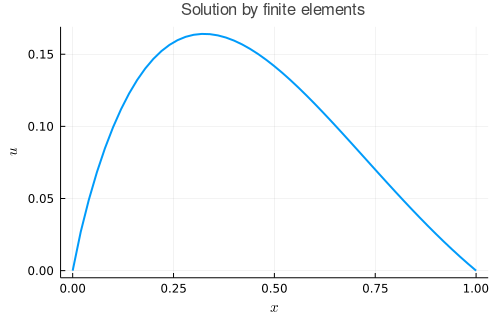

In [3]:
x,u = FNC.fem(c,q,f,0,1,50)
plot(x,u,label="",
    xaxis=(L"x"),yaxis=(L"u"),title="Solution by finite elements")

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```


```{index} order of accuracy; of the finite element method
```
Because piecewise linear interpolation on a uniform grid of size $h$ is $O(h^2)$ accurate, the accuracy of the FEM method based on linear interpolation as implemented here is similar to the second-order finite-difference method. 

## Exercises

1. ⌨ For each linear BVP, use {numref}`Function {number} <function-fem>` to solve the problem and plot the solution for $n=40$. Then for each $n=10,20,40,\ldots,640$, compute the norm of the error. Make a log-log convergence plot of error versus $n$ and compare graphically to second-order convergence.  

    **(a)** $-u''+u=-8 + 16 x^2 - x^4, \quad u(0) =u(2) =0$ 
    
    Exact solution: $x^2(4-x^2)$

    **(b)** $[(2+x)u']' +11x u = -e^x \left(12 x^3+7 x^2+1\right), \quad u(-1) =u(1) =0$ 
    
    Exact solution: $e^x \left(1-x^2\right)$

    **(c)** $u''+x(u'+u) = -x[4 \sin(x)+5 x \cos(x)], \quad u(0) =u(2\pi) =0$ 
    
    Exact solution: $-x^2\sin(x)$

    (problem-galerkin-bvpnonhom)=
2. ✍  Suppose you want to solve the differential equation $-[c(x)u']'+d(x)u = f(x)$, as in Equation {eq}`strongbvp`, except with the boundary conditions $u(a)=\alpha$, $u(b)=\beta$. Find constants $p$ and $q$ such that if $v(x)=u(x)+px+q$, then $v$ satisfies the same BVP, except that $v(a)=v(b)=0$ and $f$ is replaced by a different function. 

    (problem-galerkin-galintfactor)=
3. ✍  Suppose $p(x)u''(x)+q(x)u'(x)+r(x)=0$, and assume that $p(x)\neq 0$ for all $x$ in $[a,b]$. Let $z(x)$ be any function satisfying $z'=q/p$. Show that the differential equation is equivalent to one in the form {eq}`strongbvp`, and find the functions $c(x)$, $d(x)$, and $f(x)$ in that equation. (Hint: Start by multiplying through the equation by $\exp(z)$.) 

4. ✍ Derive {eq}`PLmass`, starting from the mass matrix definition in {eq}`femsystem`. You should replace $s(x)$ by the constant $\overline{s}_k$ within interval $I_k$.  

    (problem-galerkin-neumann)=
5. Suppose the Dirichlet boundary conditions $u(a)=u(b)=0$ are replaced by the homogeneous Neumann conditions $u'(a)=u'(b)=0$.
 
    **(a)** ✍ Explain why the weak form {eq}`weakbvp` can be derived without any boundary conditions on the test function $\psi$. 
    
    **(b)** ⌨ The result of part (a) suggests replacing {eq}`fempl` with 
    
    $$
    u(x) = \sum_{j=0}^{n} u_j H_j(x)
    $$ 
    
    and making {eq}`femsystem` hold for all $i,j$ from $0$ to $n$. Modify {numref}`Function {number} <function-fem>` to do this and thereby solve the Neumann problem. (Note that $I_1$ and $I_n$ now each make multiple contributions, like all the other integration subintervals.) 
    
    **(c)** ⌨ Test your function on the problem

    $$
      u''+u = -2 \sin(x), \quad u'(0)=u'(1)=0,
    $$

    whose exact solution is $(x-1)\cos(x) - \sin(x)$. Show second-order convergence.